<a href="https://colab.research.google.com/github/yuna1411/Car-Price-Prediction-Bootcamp/blob/main/Stage_1_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

# Import Dataset

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfcar = pd.read_csv('car_prices.csv', on_bad_lines="skip")
dfcar.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
64320,2011,Ram,3500,ST,Crew Cab,automatic,3d73y4cl7bg561934,il,3.0,436372.0,black,gray,ally,15400.0,12700.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
30024,1996,Lexus,LS 400,Base,Sedan,automatic,jt8bh22f6t0056980,wa,NaN,205750.0,green,beige,west hills chrysler jeep,1550.0,1300.0,Wed Dec 17 2014 13:05:00 GMT-0800 (PST)
72366,2005,Chevrolet,Malibu,LT,Sedan,automatic,1g1zu54855f147694,nc,2.8,109943.0,white,gray,michael wayne investments,3500.0,3900.0,Tue Jan 06 2015 01:15:00 GMT-0800 (PST)
85601,2013,Ford,Focus,SE,Sedan,automatic,1fadp3f29dl267929,or,3.5,41422.0,red,black,avis corporation,10700.0,11000.0,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
66876,2014,Dodge,Grand Caravan,SE,Minivan,NaN,2c4rdgbg6er350440,on,4.5,30009.0,blue,black,chrysler canada inc,20500.0,20500.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)


### List fitur pada dataset adalah sebagai berikut :

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. MMR : Manhiem Market Record, market yang memprediksi harga mobil.
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

# Data Exploration

In [ ]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85628 entries, 0 to 85627
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          85628 non-null  int64  
 1   make          85270 non-null  object 
 2   model         85252 non-null  object 
 3   trim          85025 non-null  object 
 4   body          83176 non-null  object 
 5   transmission  75188 non-null  object 
 6   vin           85628 non-null  object 
 7   state         85627 non-null  object 
 8   condition     73835 non-null  float64
 9   odometer      85552 non-null  float64
 10  color         85452 non-null  object 
 11  interior      85452 non-null  object 
 12  seller        85627 non-null  object 
 13  mmr           85627 non-null  float64
 14  sellingprice  85627 non-null  float64
 15  saledate      85627 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 10.5+ MB


1. Total dari data ada 558811 entry
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya
3. Terdapat nilai Null pada beberapa fitur

In [ ]:
dfcar.isnull().sum()

year                0
make              358
model             376
trim              603
body             2452
transmission    10440
vin                 0
state               1
condition       11793
odometer           76
color             176
interior          176
seller              1
mmr                 1
sellingprice        1
saledate            1
dtype: int64

Terdapat 9 fitur yang memiliki data Null, dan jumlahnya terhitung banyak terutama di fitur transmission. Perlu diadakan tindak lanjut di Data Cleaning

In [ ]:
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [ ]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,85628.000,73835.000,85552.000,85627.000,85627.000
mean,2009.186,3.325,76147.094,12370.733,12015.814
std,4.318,0.983,58479.337,9363.473,9370.222
min,1984.000,1.000,1.000,25.000,1.000
25%,2006.000,2.500,29672.000,5225.000,4800.000
50%,2011.000,3.500,62280.000,11150.000,10700.000
75%,2013.000,4.100,112535.000,16850.000,16600.000
max,2015.000,5.000,999999.000,157000.000,156000.000


1. Condition hanya memiliki value antara 1-5.
2. Value dari odometer terlihat memiliki jarak yang jauh antara min dan max.
3. MMR dan sellingprice memiliki nilai yang hampir mirip.

In [ ]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,85270,85252,85025,83176,75188,85628,85627,85452,85452,85627,85627
unique,93,864,1619,42,2,85407,36,20,17,6741,1476
top,Ford,Altima,Base,Sedan,automatic,1hgcp3f83ca041374,ca,black,black,nissan-infiniti lt,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
freq,13460,2819,9205,36775,72268,2,14411,16795,33093,2714,3601


1. Ford merupakan brand yang paling populer diantara 96 total brand lain.
2. Selain itu, mobil tipe sedan juga termasuk yang paling favorit.
3. Transmisi automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.

# **UNIVARIATE ANALYSIS**

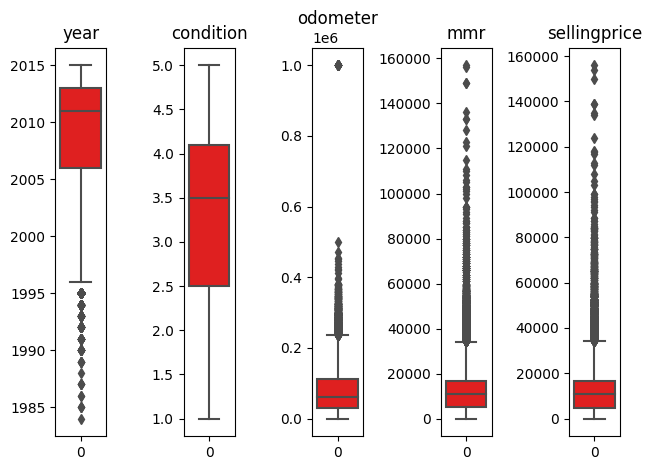

In [ ]:
#melihat penampilan outlier
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa mmr dan selling price memiliki outlier paling banyak. untuk boxplot terlihat range mmr dan selling price tergolong jauh cukup jauh. namun untuk kuartil dan mediannya berada sangat timpang. hal ini dapat terjadi karena nilai mmr dan selling price merupakan harga yang dapat bernilai luas sesuai spesifikasi mobil bekasnya.

<Figure size 700x300 with 0 Axes>

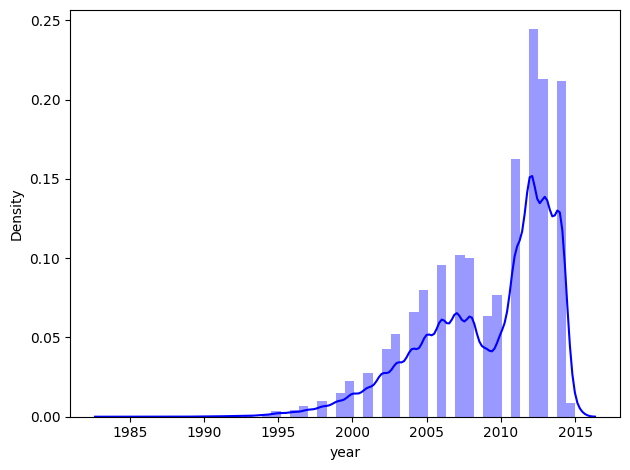

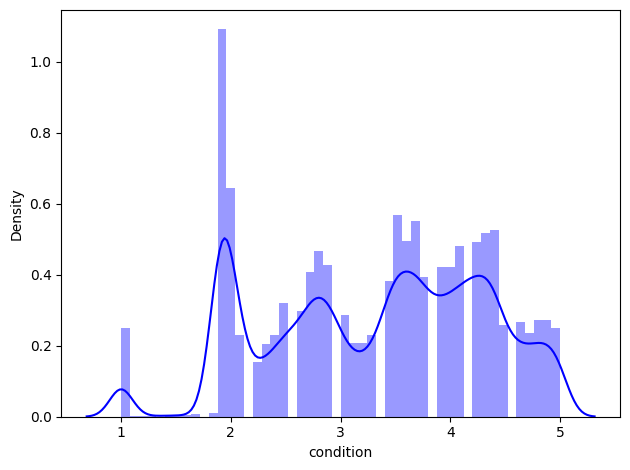

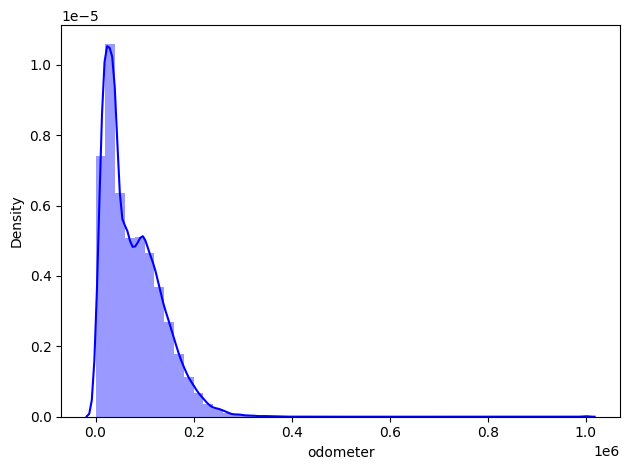

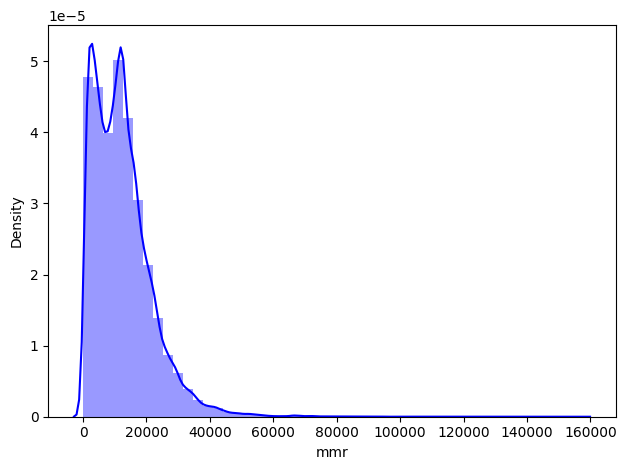

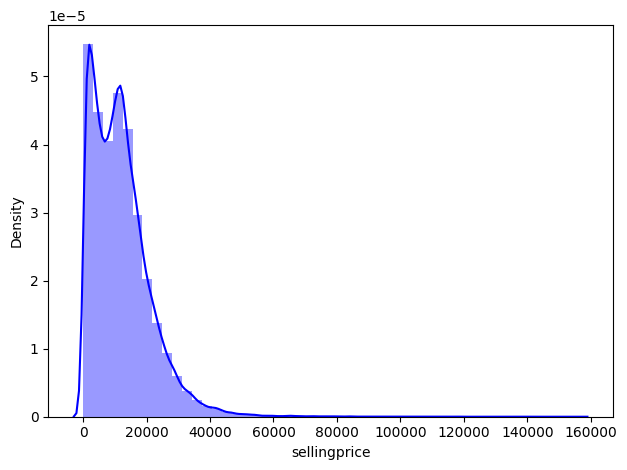

In [ ]:
#melihat grafik distribusi
plt.figure(figsize=(7, 3))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Untuk tahun penjualannya, cenderung mengalami peningkatan pada setiap tahunnya. dan puncak penjualannya berada di antara tahun 2010 hingga 2015
2. Untuk grafik kondisi, cenderung di angka kondisi 2 hingga 5. Dan dapat terlihat untuk mayoritas berada pada kondisi 2 dan paling sedikit berada pada kondisi 1
3. Untuk odometer dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2. Artinya jarak tempuh mobil tersebut masih pendek. Dan bisa disimpulkan bahwa mayoritas mobil yang dijual masih tergolong pemakaian jangka pendek
4. Untuk grafik MMR, terlihat bahwa grafik tersebut memiliki distribusi positif skew. Mayoritas nilai MMR terdistribusi di angka 0 - 50000
5. Untuk grafik selling price sama seperti MMR, terlihat juga bahwa memiliki grafik positif skew. Mayoritas nilai selling price terdistribusi di angka 0 - 60000

In [ ]:
#mengelompokan berdasarkan transmission
kel_trans = dfcar.groupby('transmission').size().reset_index(name='count')
kel_trans

,transmission,count
0,automatic,72268
1,manual,2920


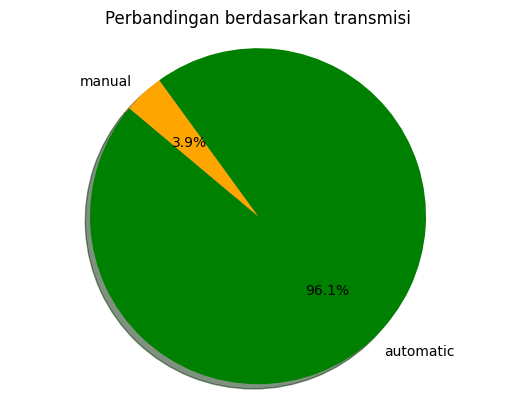

In [ ]:
#visualisasi berdasarkan transmisi
plt.pie(kel_trans['count'], labels=kel_trans['transmission'],
        autopct='%1.1f%%',
        colors=['green', 'orange'],
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perbandingan berdasarkan transmisi')
plt.show()

Dapat dilihat bahwa mayoritas mobil yang dijual menggunakan transmisi automatic

In [ ]:
#mengelompokan berdasarkan brand
top_brand = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_brand

,make,count
0,Ford,13460
1,Chevrolet,9194
2,Nissan,7758
3,Toyota,5918
4,Dodge,4710
...,...,...
88,airstream,1
89,ford tk,1
90,dot,1
91,dodge tk,1


In [ ]:
top_brand = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name= 'count').head(10)
top_brand.head()

         make  count
13       Ford  13460
7   Chevrolet   9194
33     Nissan   7758
46     Toyota   5918
10      Dodge   4710


ValueError: ignored

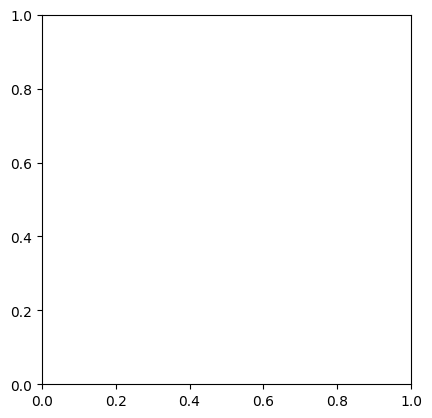

In [ ]:
#top brand mobil yg terjual
top_brand = top_brand.nlargest(5, 'count')
print(top_brand)

# Membuat pie plot dari top brand mobil yang terjual
plt.pie(top_brand['make'], labels=top_brand['count'], autopct='%1.1f%%', shadow=True, startangle=140)

# Atur aspek rasio lingkaran agar menjadi lingkaran, bukan elips
plt.axis('equal')

# Menampilkan plot
plt.title('Top 5 Brand Mobil yang Terjual')
plt.show()